In [ ]:
import pickle
import numpy as np

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_cifar10_data(file):
    batch = unpickle(file)
    data = batch[b'data']
    labels = batch[b'labels']
    return data, labels

# Load training data from all batches
x_train_batches = []
y_train_batches = []
for i in range(1, 6):
    data, labels = load_cifar10_data(f'data_batch_{i}')
    x_train_batches.append(data)
    y_train_batches.extend(labels)

# Combine batches into single training set
x_train = np.concatenate(x_train_batches, axis=0)
y_train = np.array(y_train_batches)

# Load test data
x_test, y_test = load_cifar10_data('test_batch')

# Reshape and normalize the data
x_train = x_train.reshape((len(x_train), 3, 32, 32)).transpose(0, 2, 3, 1)
x_test = x_test.reshape((len(x_test), 3, 32, 32)).transpose(0, 2, 3, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print shapes of the loaded data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


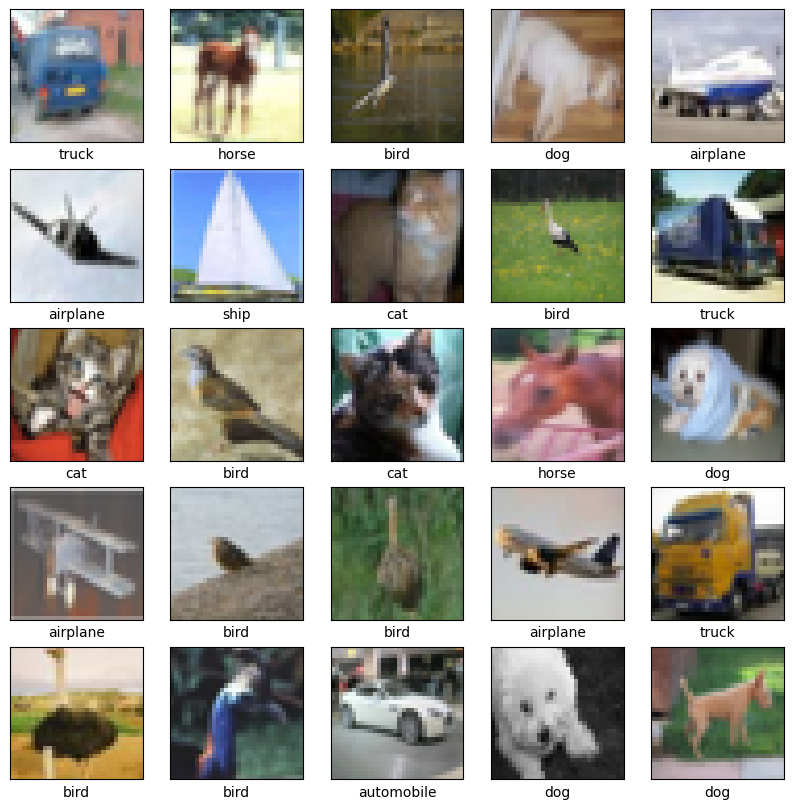

In [ ]:
              import matplotlib.pyplot as plt
import numpy as np
import random  # Import the random module

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Shuffle the dataset
indices = list(range(len(x_train)))
random.shuffle(indices)

# Plot random example images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    idx = indices[i]
    plt.imshow(x_train[idx])
    # Extract the label for the image
    label = y_train[idx]
    plt.xlabel(class_names[label])
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
cnn = Sequential()

# Convolutional layers
cnn.add(Conv2D(filters=128, kernel_size=2, activation='relu', input_shape=(32, 32, 3)))

cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(Conv2D(filters=32, kernel_size=5, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))
# Flatten layer
cnn.add(Flatten())

# Fully connected layers
cnn.add(Dense(units=80, activation='relu'))
cnn.add(Dense(units=60, activation='relu'))
cnn.add(Dense(units=60, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(units=10, activation='softmax'))

# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with EarlyStopping callback
history = cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=[early_stopping])


Epoch 1/100
1563/1563 [==============================] - 26s 15ms/step - loss: 1.7095 - accuracy: 0.3688 - val_loss: 1.3659 - val_accuracy: 0.4937
Epoch 2/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3014 - accuracy: 0.5365 - val_loss: 1.1321 - val_accuracy: 0.5952
Epoch 3/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1616 - accuracy: 0.5923 - val_loss: 1.0772 - val_accuracy: 0.6220
Epoch 4/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0726 - accuracy: 0.6253 - val_loss: 0.9844 - val_accuracy: 0.6492
Epoch 5/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0001 - accuracy: 0.6515 - val_loss: 0.9112 - val_accuracy: 0.6837
Epoch 6/100
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9467 - accuracy: 0.6718 - val_loss: 0.9239 - val_accuracy: 0.6781
Epoch 7/100
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8970 - accuracy: 0.6901 - val_loss: 0

1/1 [==============================] - 0s 17ms/step


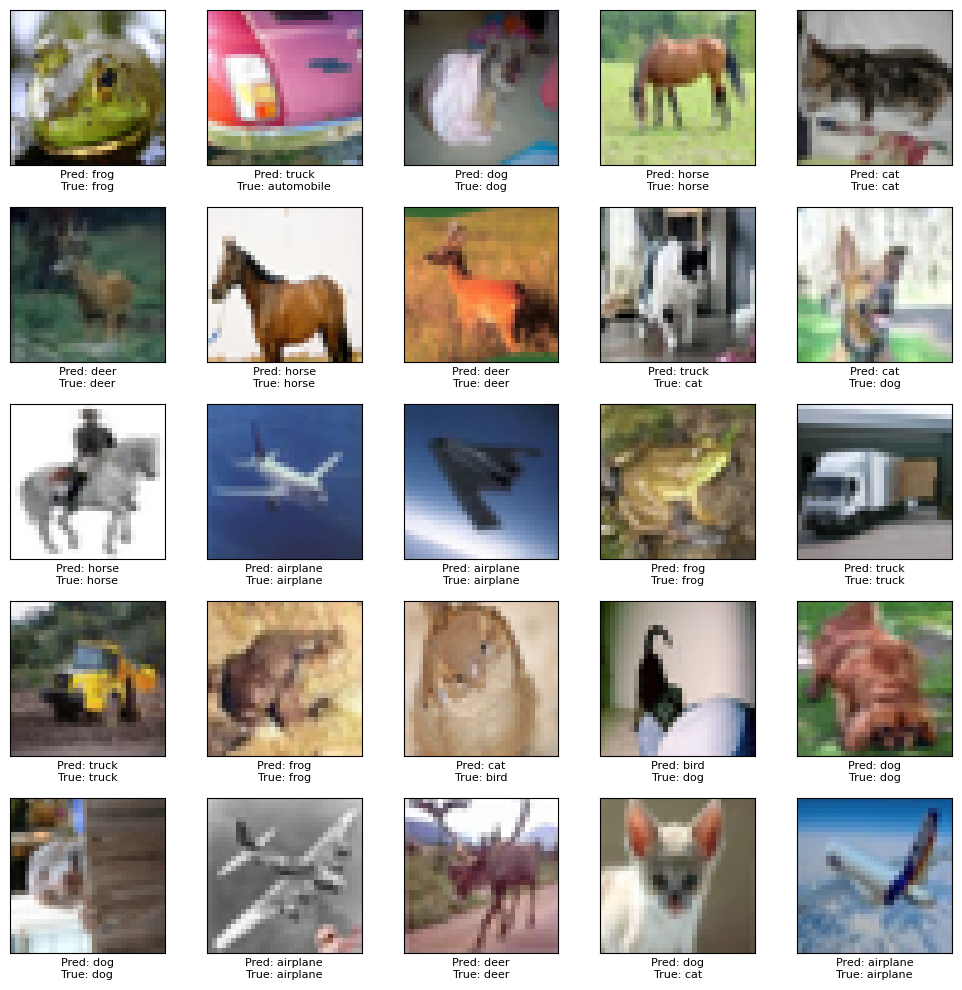

In [ ]:
import matplotlib.pyplot as plt
import random

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Shuffle indices for random images
indices = list(range(len(x_test)))
random.shuffle(indices)

# Plot example images from test set with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    idx = indices[i]
    plt.imshow(x_test[idx])
    # Get the predicted label using the trained model
    prediction = cnn.predict(np.expand_dims(x_test[idx], axis=0))
    predicted_label = class_names[np.argmax(prediction)]
    # Get the true label
    true_label = class_names[y_test[idx]]
    # Display labels without overlapping
    if len(predicted_label) > 10:
        plt.xlabel(f'Pred: {predicted_label[:10]}...\nTrue: {true_label}', fontsize=8)
    else:
        plt.xlabel(f'Pred: {predicted_label}\nTrue: {true_label}', fontsize=8)
plt.tight_layout()
plt.show()


In [ ]:
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 120)               752760    
                                                        

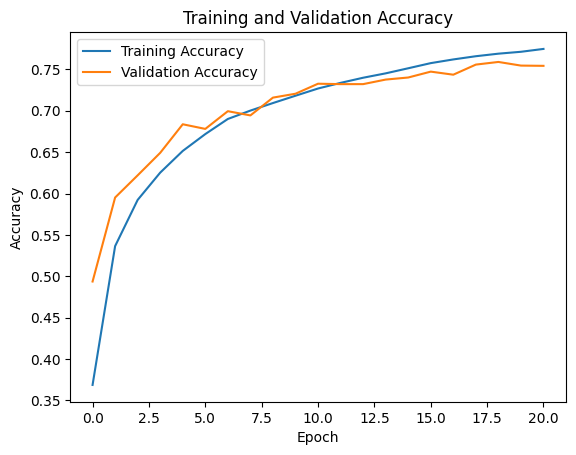

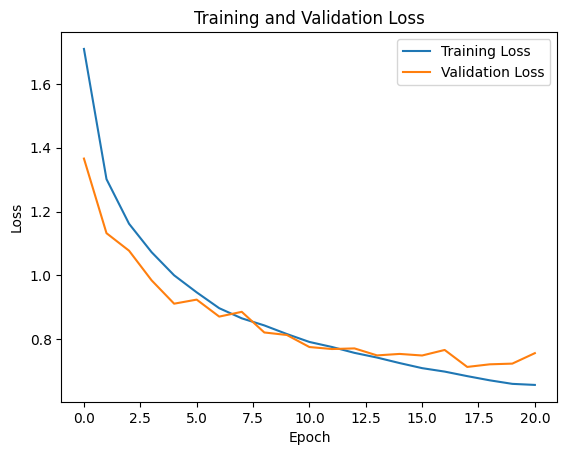

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


313/313 [==============================] - 2s 7ms/step


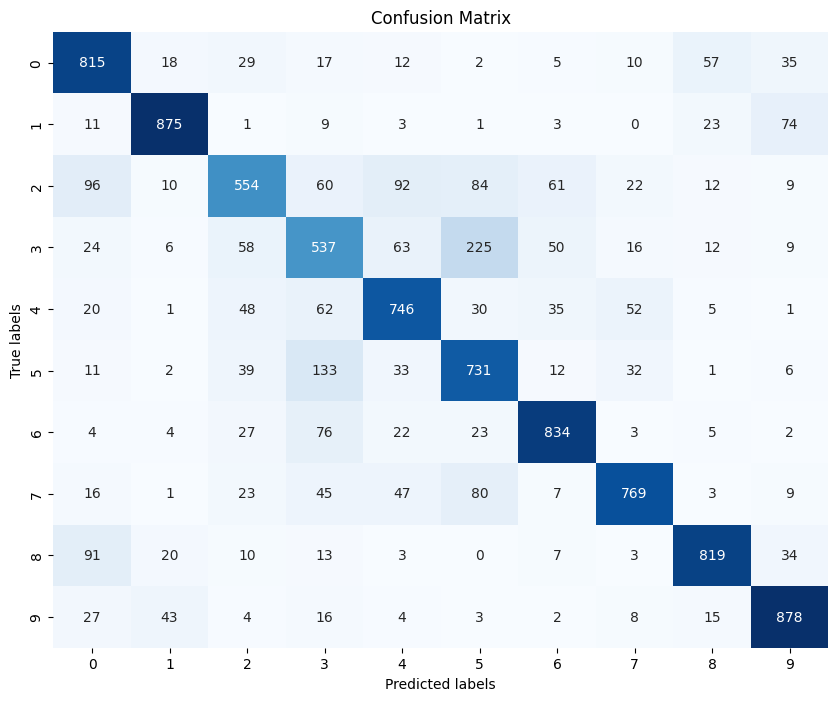

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = cnn.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
